In [90]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from scipy import ndimage
import math

**IMPORTANDO A IMAGEM DO TEMPLATE PADRÃO**

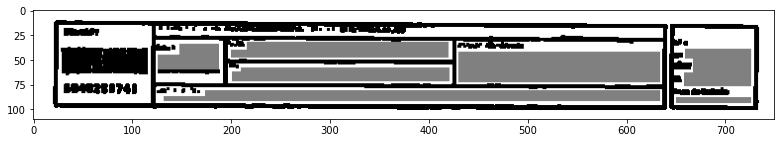

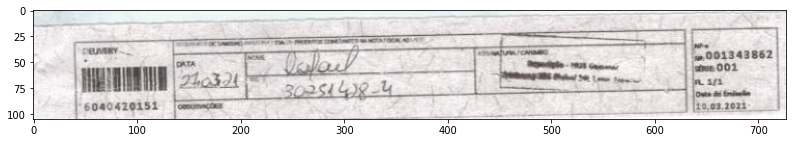

In [91]:
#TEMPLATE PADRÃO
template = cv2.imread("./imgs/m2.pgm")
plt.figure(figsize=(20,2))
plt.imshow(template)
amostra = cv2.imread("./imgs/m2_006.jpg")
plt.figure(figsize=(20,2))
plt.imshow(amostra)

**AJUSTANDO O TAMANHO DA IMAGEM**

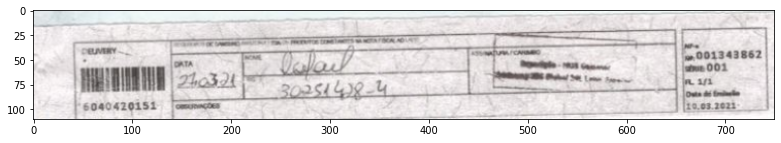

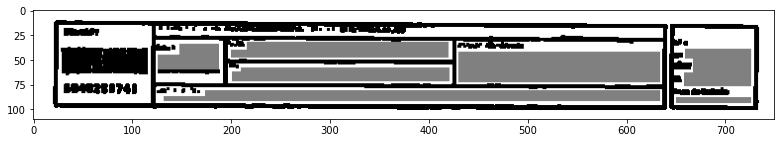

In [92]:
col, lin=template.shape[:2]
img = cv2.resize(amostra,(lin,col),interpolation = cv2.INTER_LINEAR)
plt.figure(figsize=(20,2))
plt.imshow(img)
plt.figure(figsize=(20,2))
plt.imshow(template)

In [93]:
ampliacao = (template.shape[1]*template.shape[0])/(amostra.shape[1]*amostra.shape[0])
print(f"O fator de ampliação é:{ampliacao}")

O fator de ampliação é:1.080762428767931


Angle is -0.9140


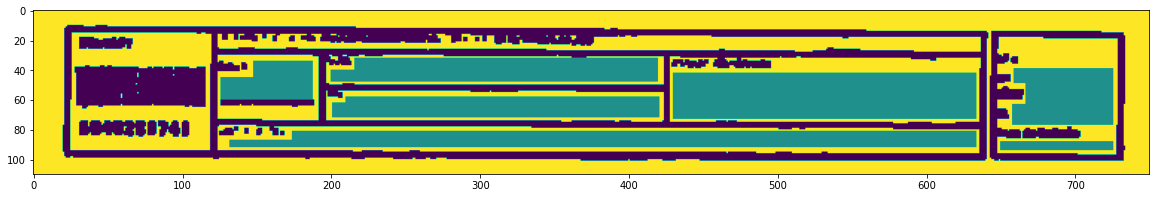

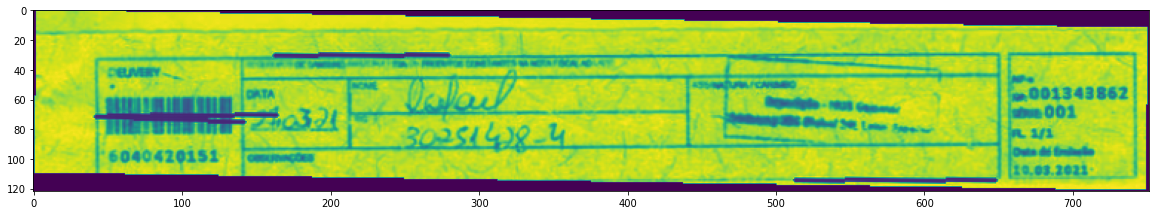

In [94]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(img_gray,100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

for [[x1, y1, x2, y2]] in lines:
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img, median_angle)

print(f"Angle is {median_angle:.04f}")
plt.figure(figsize=(20,10))
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
plt.imshow(template)
plt.figure(figsize=(20,10))
img_rotated = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2GRAY) #
plt.imshow(img_rotated)


TypeError: Image data of dtype object cannot be converted to float

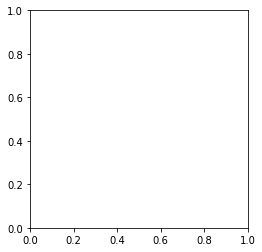

In [95]:
#plt.imshow(template+img_rotated)
#img_rotated.resize(template.shape[0],template.shape[1])
#plt.imshow(img_rotated.resize(122, 752))

img_rotated = img_rotated.resize(25, 25)
plt.imshow(img_rotated)


**APLICANDO TEMPLATE MATCHING**

In [ ]:
tp = cv2.matchTemplate(img_rotated,template,cv2.TM_CCOEFF_NORMED)
plt.figure(figsize=(20,10))
plt.imshow(tp)

In [ ]:
tp = cv2.matchTemplate(img_rotated,template,cv2.TM_CCOEFF_NORMED)
plt.figure(figsize=(20,10))
plt.imshow(tp)

In [ ]:
tp